In [20]:
import csv
import copy
import os
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# 評価する手法・モデル・データセットごとにこのファイルを複製する
dir_path = './../results/SL_SFL/mobilenet_v2_cifar10/'

# 新規に作成した日付ディレクトリ・データ分布・エポックをリストに追加することで、自動的にaccuracyとlossをプロットする
# 注意：一部手動で設定する場所があるため、修正してから実行する（エポックの値・損失の抜き取り・subplotsの設定）
date_dir_list = ['2024-07-23/', '2024-07-25/']
data_dir_list = ['accuracy', 'loss']
batch_type_list = ['B128', 'B64']
data_type_list = ['IID', 'N-IID-ClassSep', 'N-IID-Diri-06', 'N-IID-Diri-03', 'N-IID-Diri-01', 'N-IID-Diri-005']
epoch_type_list = ['R25_E10', 'R50_E5']

data_dir_dict = {}
batch_dict = {}
epoch_dict = {}
data_type_dict = {}
data_dict = {'epoch': [], 'accuracy': [], 'loss': []}

for data_dir in data_dir_list:
    data_dir_dict[data_dir] = None
for data_type in data_type_list:
    data_type_dict[data_type] = copy.deepcopy(data_dir_dict)
for epoch_type in epoch_type_list:
    epoch_dict[epoch_type] = copy.deepcopy(data_type_dict)
for batch_type in batch_type_list:
    batch_dict[batch_type] = copy.deepcopy(epoch_dict)

In [22]:
for batch_type, value1 in batch_dict.items():
    # print(f'■ batch type is {batch_type}')

    for epoch_type, value2 in value1.items():
        # print(f'\t■ epoch type is {epoch_type}')

        for data_type, value3 in value2.items():
            # print(f'\t\t■ data type is {data_type}')

            for date_dir in date_dir_list: # 異なる日付のディレクトリも確認するだけで、辞書のキーには関係ない
                for data_dir in data_dir_list:
                    # print(f'\t\t\t■ data_dir is {date_dir}{data_dir}')
                    data_dict = {'epoch': [], 'accuracy': [], 'loss': []}
                    file_path = dir_path + date_dir + data_dir + '/' + data_type + '_' + batch_type +'_' + epoch_type + '_' + data_dir + '.csv'
                    if os.path.isfile(file_path):
                        with open(file_path) as f:
                            csv_reader = csv.reader(f, delimiter=',')
                            for row in csv_reader:
                                data_dict['epoch'].append(int(row[0]))
                                data_dict[data_dir].append(float(row[1]))
                        # accuracyかlossで、エポック数を調整する
                        # ここは手動で値を設定しているから、自動的に計算できると良い
                        if data_dir == 'accuracy':
                            if len(data_dict['epoch']) == 25:
                                data_dict['epoch'] = [ x * 10 for x in data_dict['epoch'] ]
                            elif len(data_dict['epoch']) == 50:
                                data_dict['epoch'] = [ x * 5 for x in data_dict['epoch'] ]
                        elif data_dir == 'loss':
                            if len(data_dict['loss']) == 500:
                                data_dict['loss'] = data_dict['loss'][0::2]
                            elif len(data_dict['loss']) == 1000:
                                data_dict['loss'] = data_dict['loss'][0::4]
                            data_dict['epoch'] = np.arange(1, len(data_dict['loss'])+1)
                        batch_dict[batch_type][epoch_type][data_type][data_dir] = data_dict


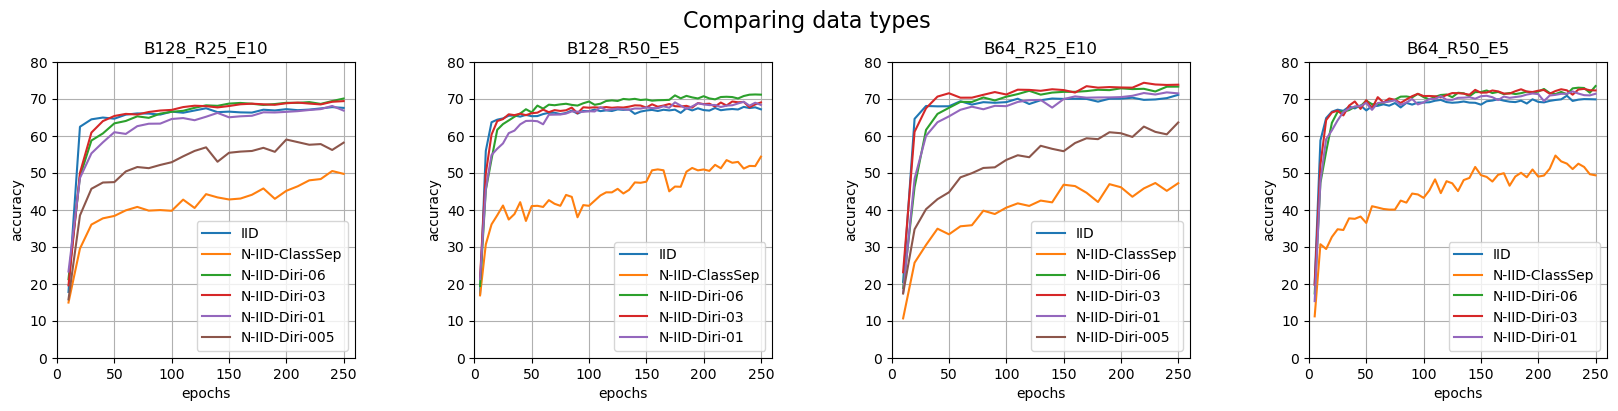

In [23]:
pattern = len(batch_type_list) * len(epoch_type_list)
fig, axes = plt.subplots(1, pattern, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)

for i, batch_type in enumerate(batch_type_list):
    for j, epoch_type in enumerate(epoch_type_list):
        ax = axes[j+i*2]
        for data_type in data_type_list:
            if batch_dict[batch_type][epoch_type][data_type]['accuracy'] is not None:
                if len(batch_dict[batch_type][epoch_type][data_type]['accuracy']['loss']) == 0:
                    epoch = batch_dict[batch_type][epoch_type][data_type]['accuracy']['epoch']
                    accuracy = batch_dict[batch_type][epoch_type][data_type]['accuracy']['accuracy']
                    ax.plot(epoch, accuracy, label=data_type)
        ax.set_title(batch_type + '_' + epoch_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('accuracy')
        ax.set_ylim((0, 80))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing data types', fontsize=16)
plt.show()

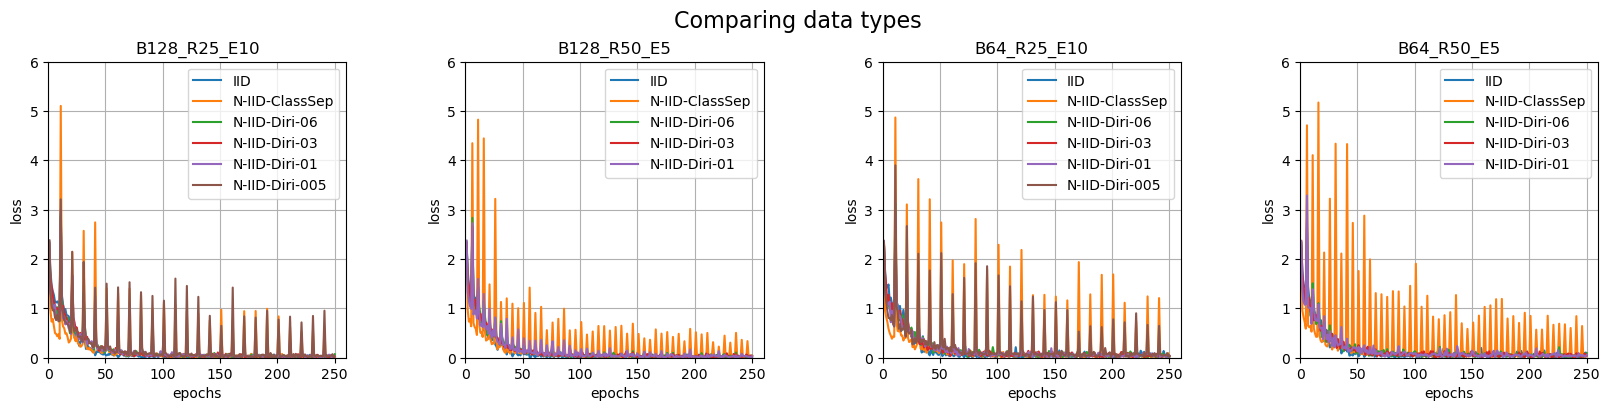

In [24]:
pattern = len(batch_type_list) * len(epoch_type_list)
fig, axes = plt.subplots(1, pattern, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)

for i, batch_type in enumerate(batch_type_list):
    for j, epoch_type in enumerate(epoch_type_list):
        ax = axes[j+i*2]
        for data_type in data_type_list:
            if batch_dict[batch_type][epoch_type][data_type]['loss'] is not None:
                if len(batch_dict[batch_type][epoch_type][data_type]['loss']['accuracy']) == 0:
                    epoch = batch_dict[batch_type][epoch_type][data_type]['loss']['epoch']
                    loss = batch_dict[batch_type][epoch_type][data_type]['loss']['loss']
                    ax.plot(epoch, loss, label=data_type)
        ax.set_title(batch_type + '_' + epoch_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_ylim((0, 6))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing data types', fontsize=16)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


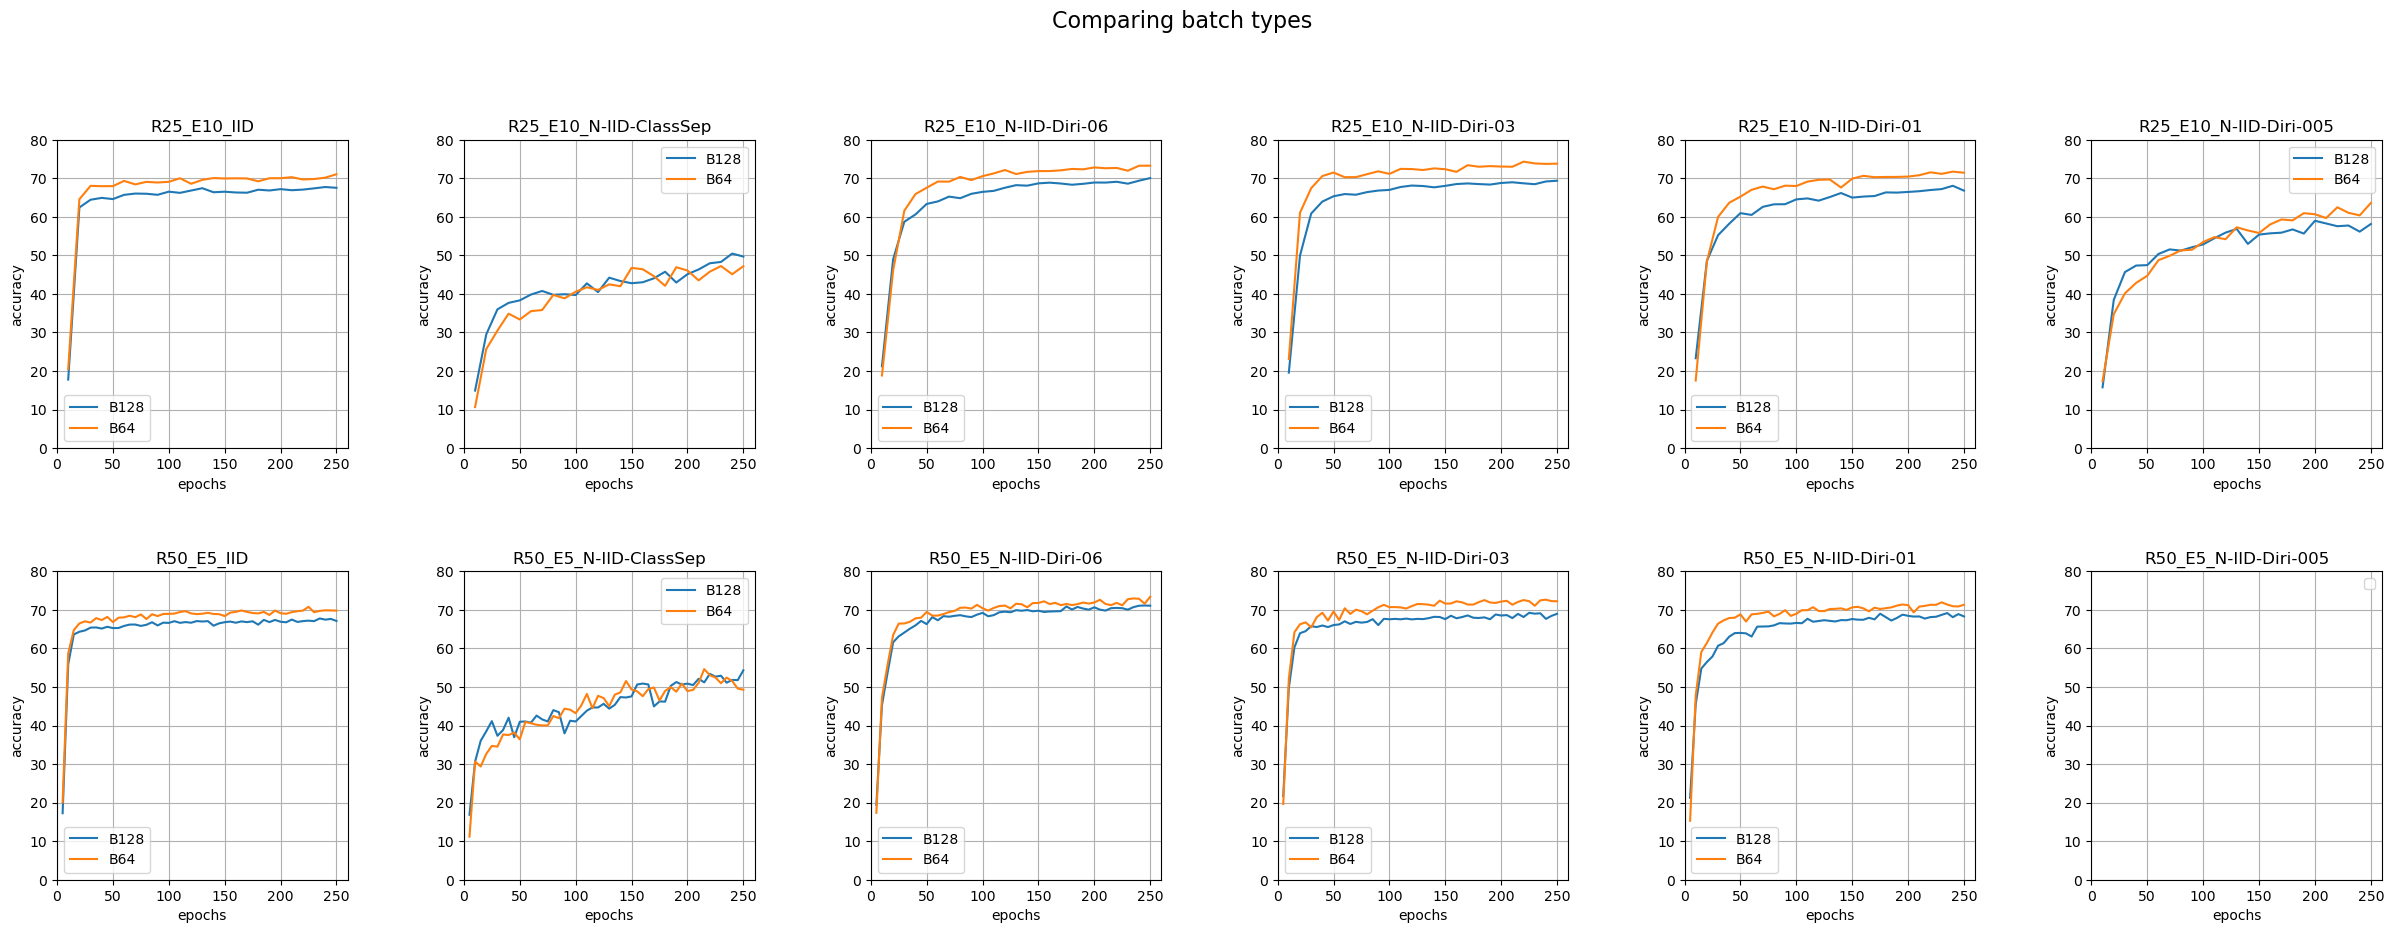

In [25]:
fig, axes = plt.subplots(2, 6, figsize=(30, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)

for i, epoch_type in enumerate(epoch_type_list):
    for j, data_type in enumerate(data_type_list):
        ax = axes[i, j]
        for batch_type in batch_type_list:
            if batch_dict[batch_type][epoch_type][data_type]['accuracy'] is not None:
                if len(batch_dict[batch_type][epoch_type][data_type]['accuracy']['loss']) == 0:
                    epoch = batch_dict[batch_type][epoch_type][data_type]['accuracy']['epoch']
                    accuracy = batch_dict[batch_type][epoch_type][data_type]['accuracy']['accuracy']
                    ax.plot(epoch, accuracy, label=batch_type)
        ax.set_title(epoch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('accuracy')
        ax.set_ylim((0, 80))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing batch types', fontsize=16)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


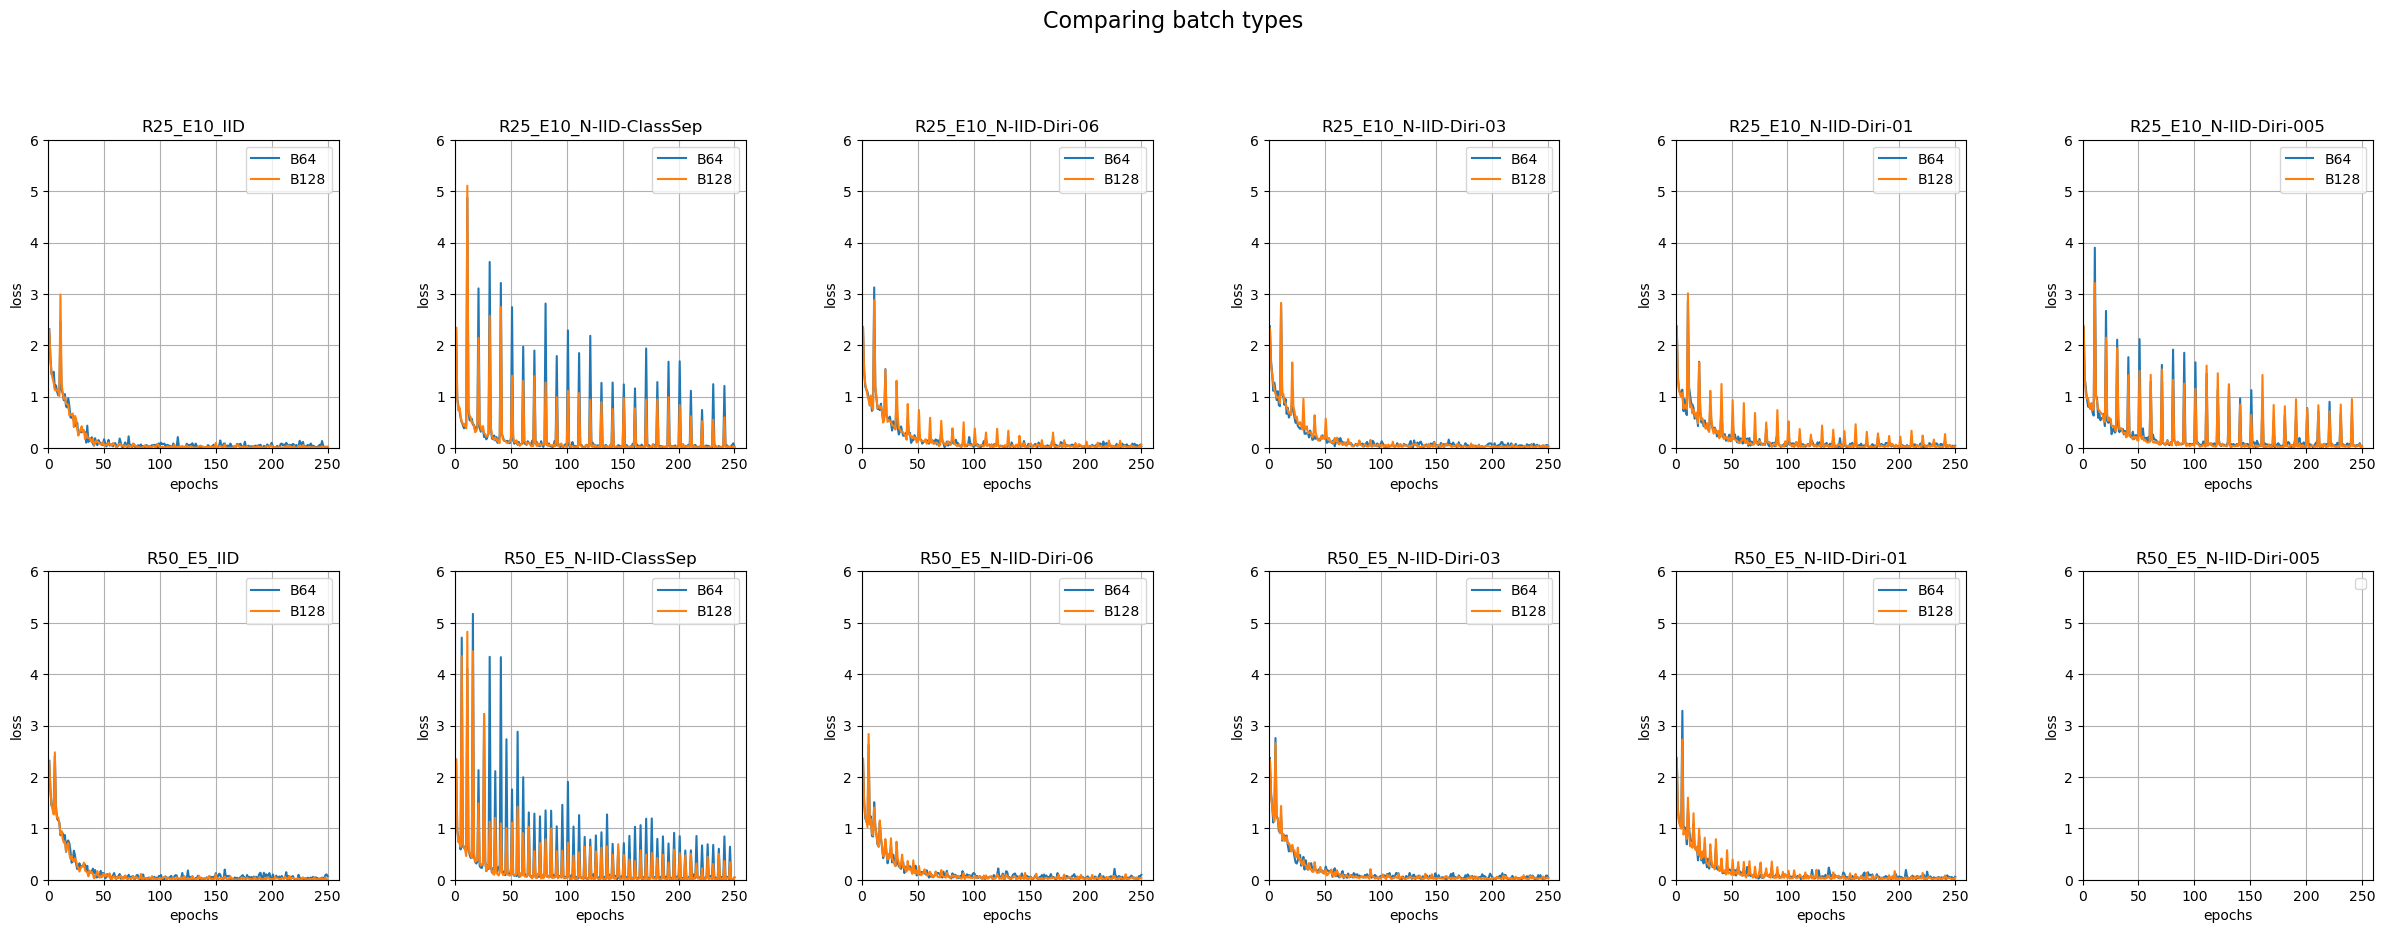

In [26]:
fig, axes = plt.subplots(2, 6, figsize=(30, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)

for i, epoch_type in enumerate(epoch_type_list):
    for j, data_type in enumerate(data_type_list):
        ax = axes[i, j]
        for batch_type in reversed(batch_type_list):
            if batch_dict[batch_type][epoch_type][data_type]['loss'] is not None:
                if len(batch_dict[batch_type][epoch_type][data_type]['loss']['accuracy']) == 0:
                    epoch = batch_dict[batch_type][epoch_type][data_type]['loss']['epoch']
                    loss = batch_dict[batch_type][epoch_type][data_type]['loss']['loss']
                    ax.plot(epoch, loss, label=batch_type)
        ax.set_title(epoch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_ylim((0, 6))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing batch types', fontsize=16)
plt.show()

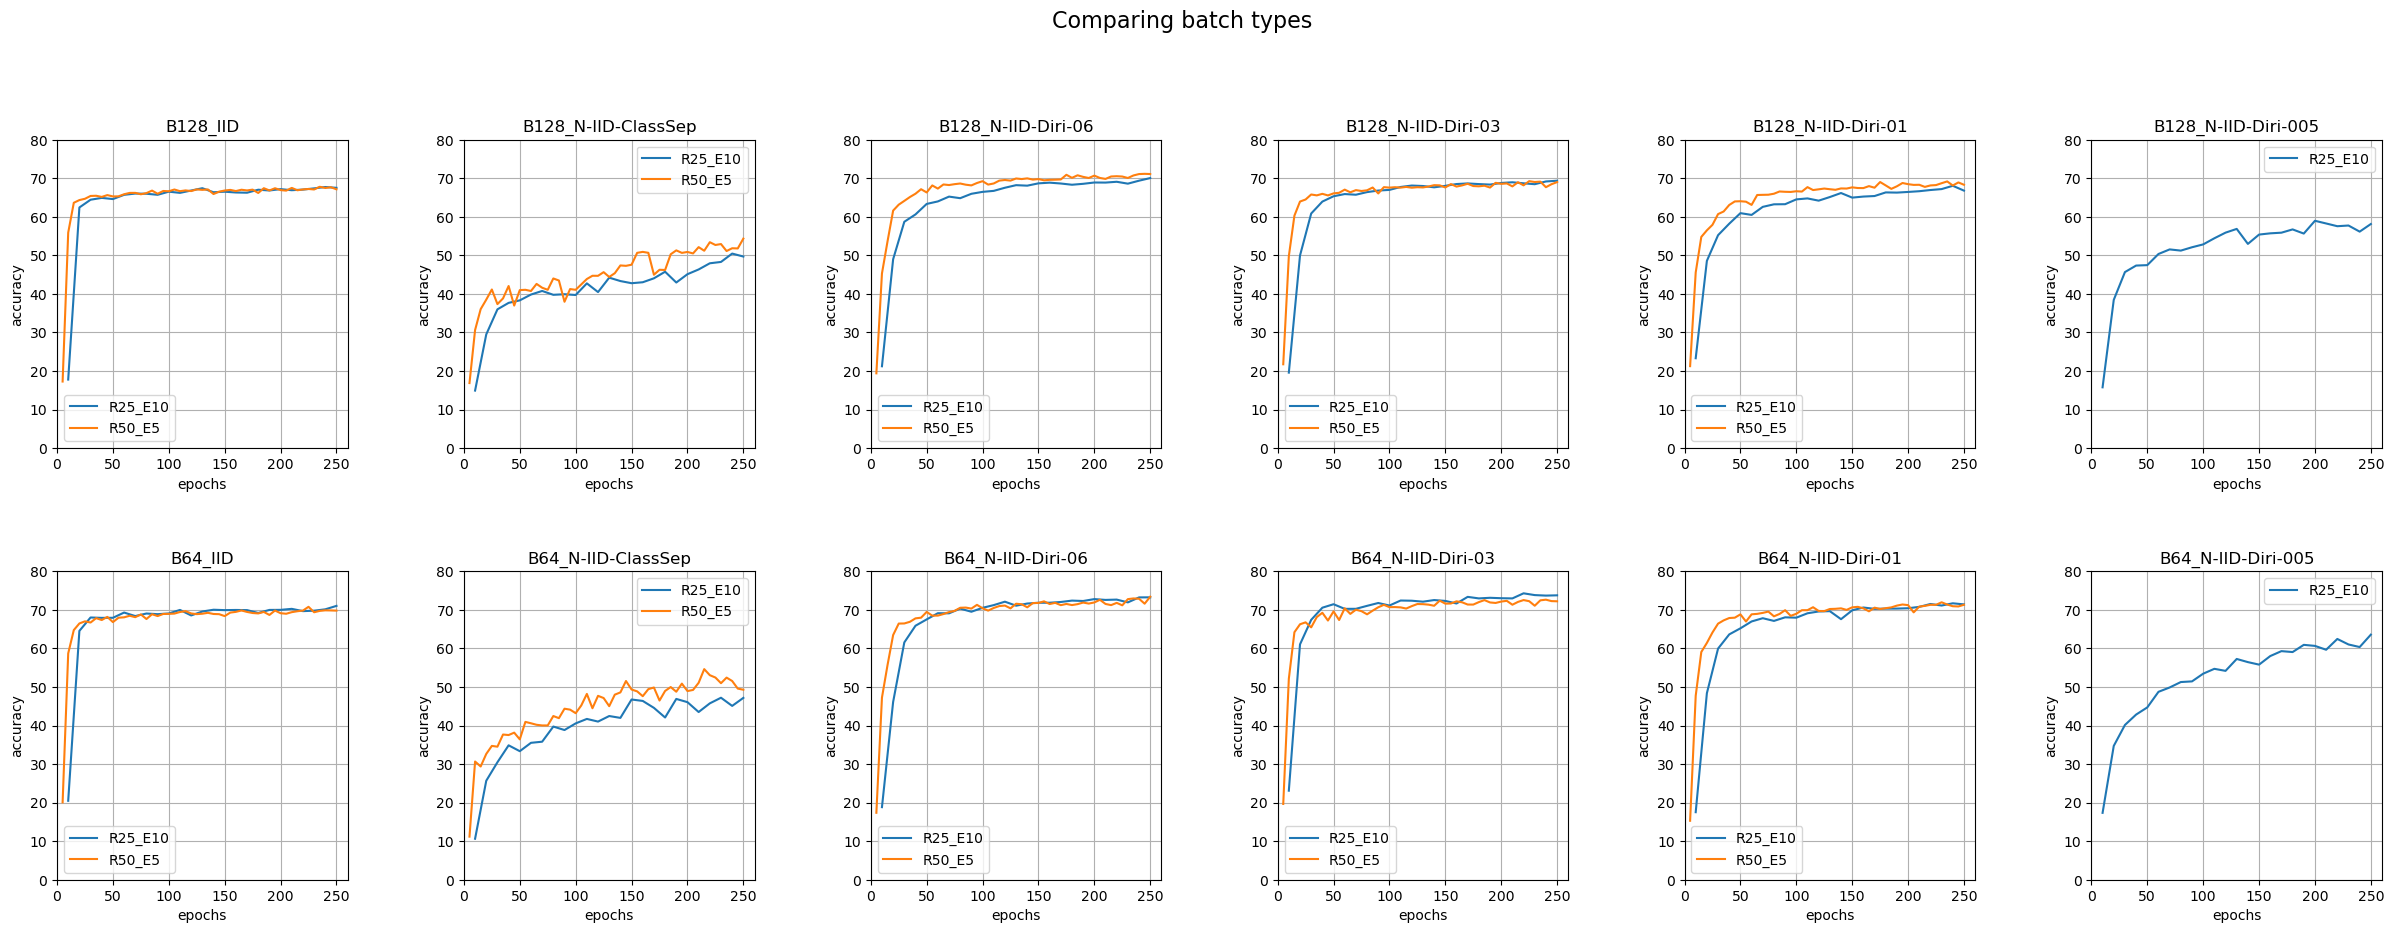

In [27]:
fig, axes = plt.subplots(2, 6, figsize=(30, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)

for i, batch_type in enumerate(batch_type_list):
    for j, data_type in enumerate(data_type_list):
        ax = axes[i, j]
        for epoch_type in epoch_type_list:
            if batch_dict[batch_type][epoch_type][data_type]['accuracy'] is not None:
                if len(batch_dict[batch_type][epoch_type][data_type]['accuracy']['loss']) == 0:
                    epoch = batch_dict[batch_type][epoch_type][data_type]['accuracy']['epoch']
                    accuracy = batch_dict[batch_type][epoch_type][data_type]['accuracy']['accuracy']
                    ax.plot(epoch, accuracy, label=epoch_type)
        ax.set_title(batch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('accuracy')
        ax.set_ylim((0, 80))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing batch types', fontsize=16)
plt.show()

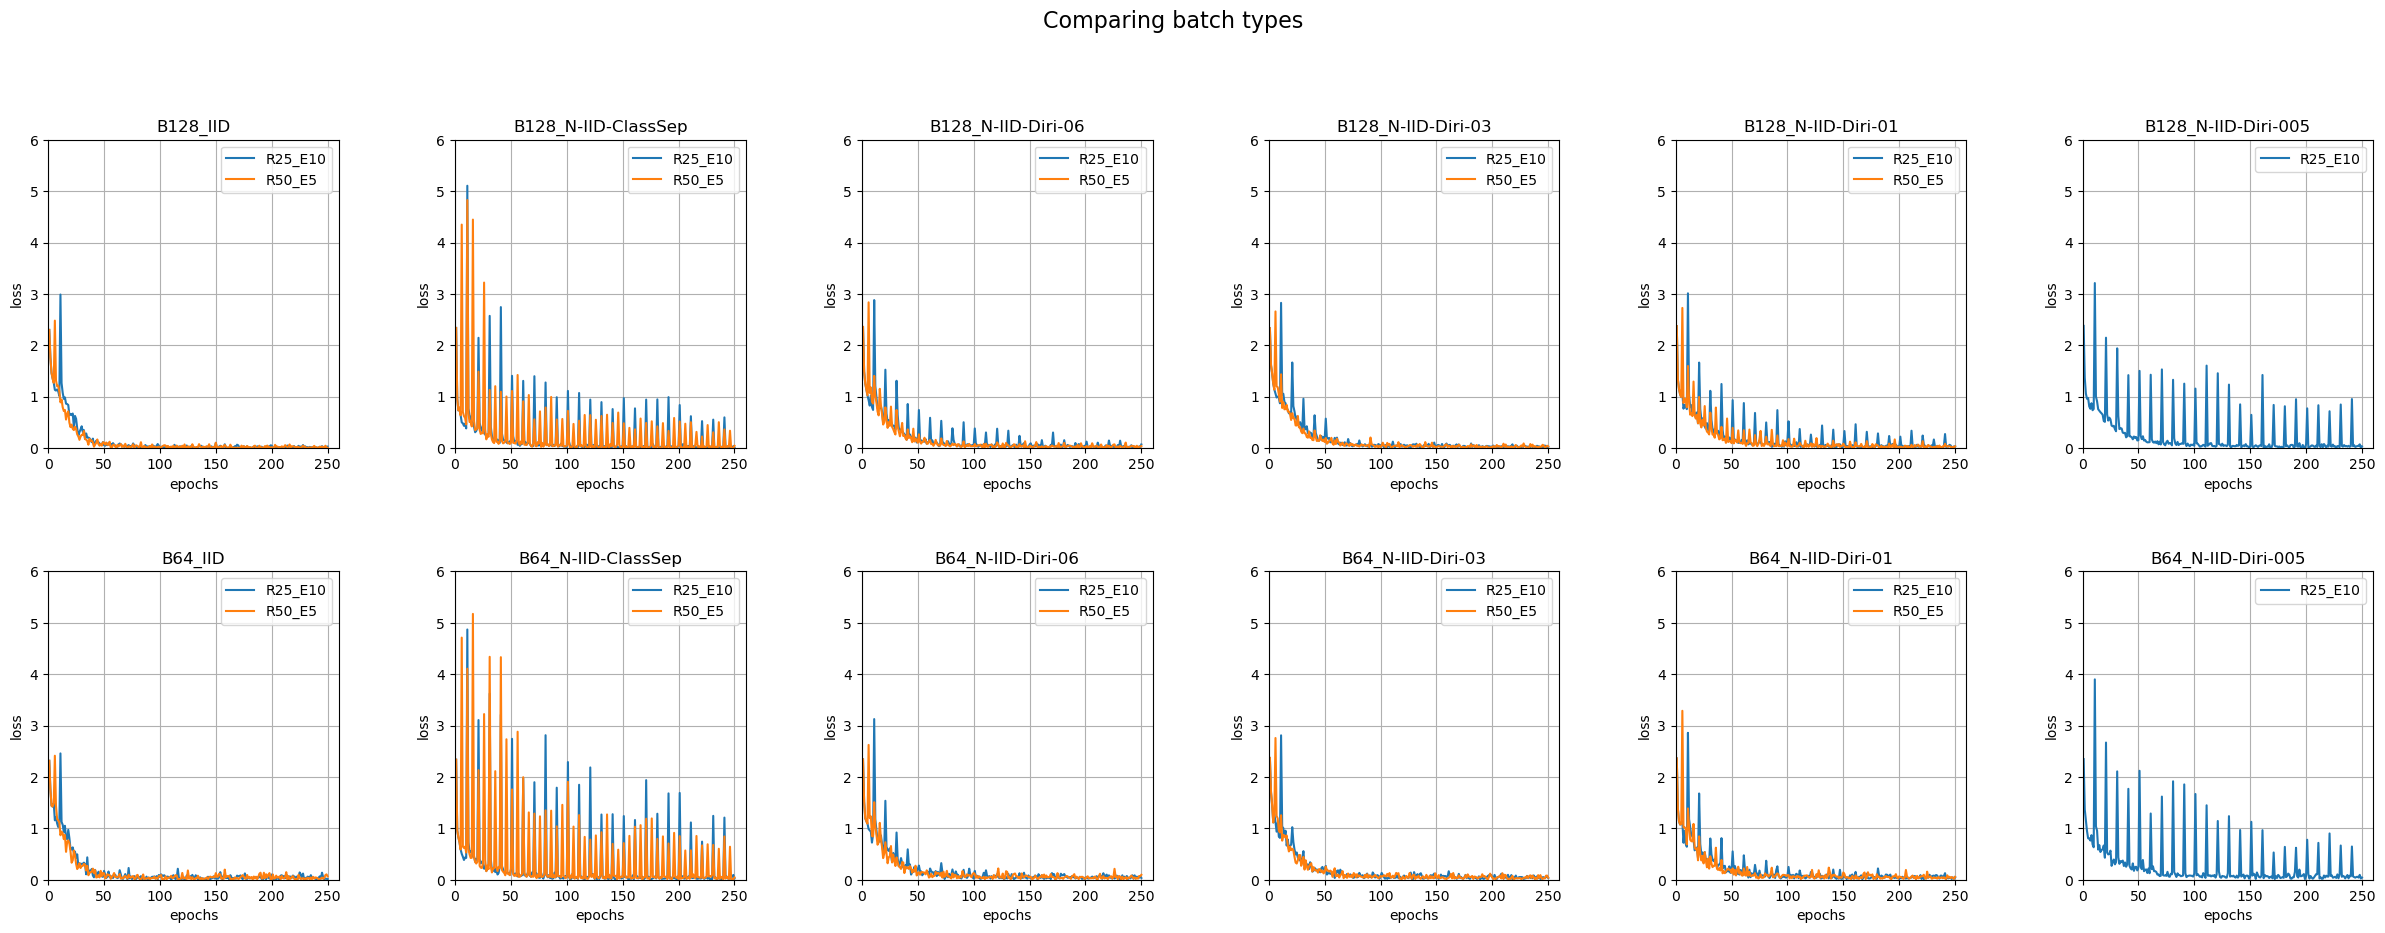

In [28]:
fig, axes = plt.subplots(2, 6, figsize=(30, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4, top=0.85)

for i, batch_type in enumerate(batch_type_list):
    for j, data_type in enumerate(data_type_list):
        ax = axes[i, j]
        for epoch_type in epoch_type_list:
            if batch_dict[batch_type][epoch_type][data_type]['loss'] is not None:
                if len(batch_dict[batch_type][epoch_type][data_type]['loss']['accuracy']) == 0:
                    epoch = batch_dict[batch_type][epoch_type][data_type]['loss']['epoch']
                    loss = batch_dict[batch_type][epoch_type][data_type]['loss']['loss']
                    ax.plot(epoch, loss, label=epoch_type)
        ax.set_title(batch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_ylim((0, 6))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

fig.suptitle('Comparing batch types', fontsize=16)
plt.show()